In [8]:
!pip install -q --upgrade distributed==2024.1.0 "dask[complete]==2024.1.0" "dask-ml[complete]" \
     zarr xarray gcsfs pandas

In [11]:
import dask, distributed
dask.__version__, distributed.__version__

('2024.1.0', '2024.1.0')

In [13]:
from dask.distributed import Client
client = Client("tcp://127.0.0.1:8080")

client

<Client: 'tcp://10.4.0.6:8786' processes=16 threads=128, memory=501.65 GiB>

2024-08-29 20:01:51,351 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [4]:
# make sure to install packages via EXTRA_PIP_PACKAGES or as:

from dask.distributed import PipInstall
plugin = PipInstall(packages=["dask-ml[complete]", "gcsfs", "zarr", "xarray"], pip_options=["--upgrade"])
client.register_worker_plugin(plugin)

/tmp/ipykernel_6938/2728827019.py:5: DeprecationWarning: `Client.register_worker_plugin` has been deprecated; please use `Client.register_plugin` instead
  client.register_worker_plugin(plugin)
/tmp/ipykernel_6938/2728827019.py:5: UserWarning: Registering a `SchedulerPlugin` as a worker plugin is not allowed, registering as a scheduler plugin instead. To register as a worker plugin, inherit from `WorkerPlugin`.
  client.register_worker_plugin(plugin)


In [14]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [18]:
X, y = dask_ml.datasets.make_blobs(n_samples=100_000_000,
                                   chunks=10_000_000,
                                   random_state=0,
                                   centers=5)
X = X.persist()
X

dask.array<concatenate, shape=(100000000, 2), dtype=float64, chunksize=(10000000, 2), chunktype=numpy.ndarray>

In [21]:
km = dask_ml.cluster.KMeans(n_clusters=5, init_max_iter=2, oversampling_factor=10)
km.fit(X)

/home/dgena/.local/lib/python3.10/site-packages/dask/base.py:1481: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


KMeans(init_max_iter=2, n_clusters=5, oversampling_factor=10)

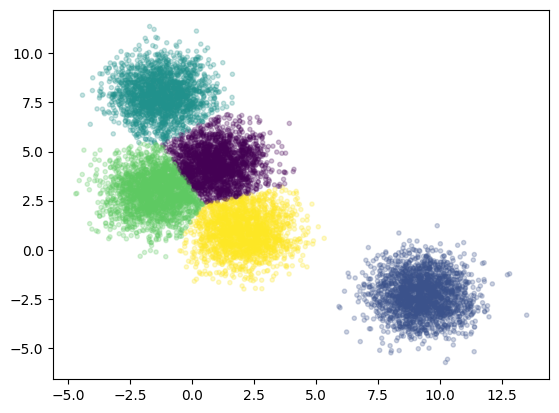

In [22]:
fig, ax = plt.subplots()
ax.scatter(X[::10000, 0], X[::10000, 1], marker='.', c=km.labels_[::10000], cmap='viridis', alpha=0.25);